# Initialization

In [1]:
# Helper functions and common imports
import pandas as pd
from numpy import log10, sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def euclid(x, y, df, take_log=False):
    if take_log:
        return sqrt(sum((log10(df[x])-log10(df[y]))**2))
    else:
        return sqrt(sum((df[x]-df[y])**2))
    
def sema(vect, fig):
    #semantics=', '.join('{}={}'.format(x,y) for (x,y) in fig.pepperargs['default'].items() if x != 'conc')
    nv = []
    for line in vect:
        v = []
        for (x,y) in fig.pepperargs[line].items():
            if x == 'conc': continue
            if x == 'max_complex_size': continue
            if x == 'max_complex_count': continue
            if x == 'max_reaction_count': continue
            if x == 'condensed': 
                z = x if y is True else 'detailed'
            else:
                z = '{}={}'.format(x,y)
            #print(z)
            v.append(z)
        nv.append(', '.join(v))
    return nv


In [2]:
# Retrieve the list of FigureData Objects.
from qian2011 import data; q11 = data()
from qian2011sqrt import data; q11sq = data()

# Get / Update Peppercorn estimates

In [3]:
# Generate Peppercorn estimates for every FigureData setup.
verb = 0

Table1 = pd.DataFrame()
for fig in q11:
    print(fig.name)
    fig.pepperargs['ddG'] = fig.pepperargs['default'].copy()
    fig.pepperargs['ddG']['ddG_bind']=0.4
    #fig.pepperargs['seesaw']={'seesaw-rxns':'seesaw-T20-utbr-leak-reduced', 'seesaw-conc':100e-9}
    fig.eval('default', verbose = verb)
    fig.eval('ddG', verbose = verb)
    #fig.eval('seesaw', verbose = verb)
    for df in fig.get_dataframes():
        df['Name']=fig.name# + '-' + df['pepperargs']
        df['Semantics']=sema(df['Semantics'], fig)
        #display(df)
        Table1 = Table1.append(df)

Sup. Fig. 22: Single catalyst, no threshold
Sup. Fig. 23: Single catalyst and threshold
Fig. 2C: Two-input OR gate
Fig. 2C: Two-input AND gate
Sup. Fig. 26: Three-layer OR cascade
Sup. Fig. 27: Four-layer OR cascade
Sup. Fig. 28: Five AND/OR gates, four layers
Sup. Fig. 29: Four-input OR gates
Sup. Fig. 29: Four-input AND gates


In [4]:
display(Table1)
from os import remove
fig = q11[2]
print fig.name
print fig._enumerated
for ef in fig._enumerated:
    print ef
    #remove(ef)
#fig._enumerated = set()

,Input Filename,Simulation,Reporter,Metric,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),Name
0,tmp/Qian2011-SF22-00,I=100,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",94.975512,139.038622,72.89,738.55,"Sup. Fig. 22: Single catalyst, no threshold"
1,tmp/Qian2011-SF22-00,I=90,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",94.611881,146.040567,71.75,766.03,"Sup. Fig. 22: Single catalyst, no threshold"
2,tmp/Qian2011-SF22-00,I=80,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",94.296629,156.043345,70.62,796.95,"Sup. Fig. 22: Single catalyst, no threshold"
3,tmp/Qian2011-SF22-00,I=70,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",93.842311,168.046680,69.18,834.73,"Sup. Fig. 22: Single catalyst, no threshold"
4,tmp/Qian2011-SF22-00,I=60,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",93.294597,184.051125,67.22,886.26,"Sup. Fig. 22: Single catalyst, no threshold"
5,tmp/Qian2011-SF22-00,I=50,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",92.509692,205.056960,65.05,951.53,"Sup. Fig. 22: Single catalyst, no threshold"
6,tmp/Qian2011-SF22-00,I=40,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",91.334085,234.065018,61.75,1040.84,"Sup. Fig. 22: Single catalyst, no threshold"
7,tmp/Qian2011-SF22-00,I=30,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",89.660728,280.077799,57.32,1157.63,"Sup. Fig. 22: Single catalyst, no threshold"
8,tmp/Qian2011-SF22-00,I=20,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",86.679959,360.100028,50.31,1353.44,"Sup. Fig. 22: Single catalyst, no threshold"
9,tmp/Qian2011-SF22-00,I=10,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",79.815736,547.151987,37.53,1700.38,"Sup. Fig. 22: Single catalyst, no threshold"


Fig. 2C: Two-input OR gate
set(['tmp/Qian2011-F2C-OR-00-default-enum.pil', 'tmp/Qian2011-F2C-OR-00-ddG-enum.pil'])
tmp/Qian2011-F2C-OR-00-default-enum.pil
tmp/Qian2011-F2C-OR-00-ddG-enum.pil


# Squareroot circuit

In [5]:
from qian2011sqrt import data; q11sqrt = data()
# modify seesaw reading so that threshold reaction uses kf and not ks, then check simulations with and without utbr to see the difference.
# If utbr still contributes, then we actually lose info due to this one rxn, if not, then it is something we cannot handle anyways.

# ok - reverting the changes. The differences between varinats were very small! so utbr with kfs != krs is not useful.

In [6]:
# Generate Peppercorn estimates for every FigureData setup.
verb = 1
#Table1 = pd.DataFrame()
for fig in q11sqrt:
    print(fig.name)
    #fig.pepperargs['seesaw']={'seesaw-rxns':'seesaw-T25-utbr-leak-reduced', 'seesaw-conc':50e-9}
    fig.pepperargs['ddG']=fig.pepperargs['default'].copy()
    fig.pepperargs['ddG']['ddG_bind']=0.4
    fig.eval('default', verbose = verb, cmpfig=True)
    #fig.eval('seesaw', verbose = verb, cmpfig=True)
    fig.eval('ddG', verbose=verb, cmpfig=True)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        Table1 = Table1.append(df)

Sup. Fig. 31: Integer 4-bit squareroot circuit
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: d

In [7]:
#fig=q11sqrt[0]
#fig._enumerated = set(['tmp/Qian2011-SF31-00-CONDENSED-enum.pil'])
#fig._simulated = set(['tmp/Qian2011-SF31-00-CONDENSED-y1_0-1101-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1100-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0110-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0010-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0011-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1010-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0100-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0000-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0011-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0111-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1110-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0100-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0010-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0001-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1000-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1010-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1011-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1101-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0110-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0101-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0101-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1001-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1111-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1011-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1111-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0111-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1000-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1001-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0000-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1100-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0001-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1110-simu'])
#fig._simexecs = set(['tmp/Qian2011-SF31-00-CONDENSED-simu.py'])

ZeroDivisionError: integer division or modulo by zero

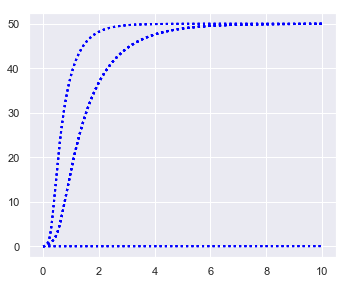

In [8]:
# Get Data from File
SQ = q11sqrt[0]
df = pd.read_table(SQ.cmpfig['ddG'], sep='\s+')

time = df.values[:,0]/3600
y1_0 = df.values[:,1:17]
y1_1 = df.values[:,17:33]
y2_0 = df.values[:,33:49]
y2_1 = df.values[:,49:]

#legend = ['20 nM', '6 nM', '2 nM', '1 nM', '0.6 nM', '0.4 nM', '0.2 nM', '0.1 nM', '0.06 nM', '0.02 nM', '0.01 nM', '0 nM']
#legend = list(df)[1:]

#assert ys.shape[1] == len(legend)
plt.figure(figsize=(5.5,4.5))

# Plot the data
plt.plot(time, y1_0, color='blue', linestyle=':')
plt.plot(time, y1_1, color='blue')
plt.plot(time, y2_0, color='red', linestyle=':')
plt.plot(time, y2_1, color='red')
plt.plot([0,8], [40, 0], linewidth=1, color='black', linestyle='--', zorder=1)
plt.xlim(-0.5,10.5)
#plt.xticks(np.arange(0, 21, step=5))

plt.ylim(-3,53)
#plt.yticks(np.arange(0, 21, step=5))

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', linestyle=':', lw=2),
                Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='red', linestyle=':', lw=2),
                Line2D([0], [0], color='red', lw=2)]
#plt.legend(legend, ncol=1, loc='center right', fontsize=7);
plt.legend(custom_lines, ['$Y_1 0$', '$Y_11$', '$Y_20$', '$Y_21$'])

plt.gca().set_title('Superimposed squareroot circuit simulations.', fontsize=15)
plt.gca().set_xlabel('Time [hours]', fontsize=15)
plt.gca().set_ylabel('Concentration [nM]', fontsize=15)
#plt.gca().axhline(y=10, linewidth=1, color='black', linestyle='--')

plt.savefig('qian2011_sqrt_simu_ddG.pdf', bbox_inches='tight')
plt.savefig('qian2011_sqrt_simu_ddG.svg', bbox_inches='tight')

In [ ]:
# Get Data from File
SQ = q11sqrt[0]
df = pd.read_table(SQ.cmpfig['seesaw'], sep='\s+')

time = df.values[:,0]/3600
y1_0 = df.values[:,1:17]
y1_1 = df.values[:,17:33]
y2_0 = df.values[:,33:49]
y2_1 = df.values[:,49:]

#legend = ['20 nM', '6 nM', '2 nM', '1 nM', '0.6 nM', '0.4 nM', '0.2 nM', '0.1 nM', '0.06 nM', '0.02 nM', '0.01 nM', '0 nM']
#legend = list(df)[1:]

#assert ys.shape[1] == len(legend)
plt.figure(figsize=(5.5,4.5))

# Plot the data
plt.plot(time, y1_0, color='blue', linestyle=':')
plt.plot(time, y1_1, color='blue')
plt.plot(time, y2_0, color='red', linestyle=':')
plt.plot(time, y2_1, color='red')
plt.plot([0,8], [40, 0], linewidth=1, color='black', linestyle='--', zorder=1)
plt.xlim(-0.5,10.5)
#plt.xticks(np.arange(0, 21, step=5))

plt.ylim(-3,53)
#plt.yticks(np.arange(0, 21, step=5))

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', linestyle=':', lw=2),
                Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='red', linestyle=':', lw=2),
                Line2D([0], [0], color='red', lw=2)]
#plt.legend(legend, ncol=1, loc='center right', fontsize=7);
plt.legend(custom_lines, ['$Y_1 0$', '$Y_11$', '$Y_20$', '$Y_21$'])

plt.gca().set_title('Superimposed squareroot circuit simulations.', fontsize=15)
plt.gca().set_xlabel('Time [hours]', fontsize=15)
plt.gca().set_ylabel('Concentration [nM]', fontsize=15)
#plt.gca().axhline(y=10, linewidth=1, color='black', linestyle='--')

plt.savefig('qian2011_sqrt_simu_seesaw.pdf', bbox_inches='tight')
plt.savefig('qian2011_sqrt_simu_seesaw.svg', bbox_inches='tight')

# Seesaw sytems comparison

,Input Filename,Simulation,Reporter,Metric,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),Name
0,tmp/Qian2011-SF22-00,I=100,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",94.975512,139.038622,72.89,738.55,"Sup. Fig. 22: Single catalyst, no threshold"
1,tmp/Qian2011-SF22-00,I=90,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",94.611881,146.040567,71.75,766.03,"Sup. Fig. 22: Single catalyst, no threshold"
2,tmp/Qian2011-SF22-00,I=80,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",94.296629,156.043345,70.62,796.95,"Sup. Fig. 22: Single catalyst, no threshold"
3,tmp/Qian2011-SF22-00,I=70,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",93.842311,168.046680,69.18,834.73,"Sup. Fig. 22: Single catalyst, no threshold"
4,tmp/Qian2011-SF22-00,I=60,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",93.294597,184.051125,67.22,886.26,"Sup. Fig. 22: Single catalyst, no threshold"
5,tmp/Qian2011-SF22-00,I=50,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",92.509692,205.056960,65.05,951.53,"Sup. Fig. 22: Single catalyst, no threshold"
6,tmp/Qian2011-SF22-00,I=40,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",91.334085,234.065018,61.75,1040.84,"Sup. Fig. 22: Single catalyst, no threshold"
7,tmp/Qian2011-SF22-00,I=30,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",89.660728,280.077799,57.32,1157.63,"Sup. Fig. 22: Single catalyst, no threshold"
8,tmp/Qian2011-SF22-00,I=20,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",86.679959,360.100028,50.31,1353.44,"Sup. Fig. 22: Single catalyst, no threshold"
9,tmp/Qian2011-SF22-00,I=10,O,diagonal-crossing-time:2700:100,"condensed, k_fast=1, k_slow=0.01",79.815736,547.151987,37.53,1700.38,"Sup. Fig. 22: Single catalyst, no threshold"


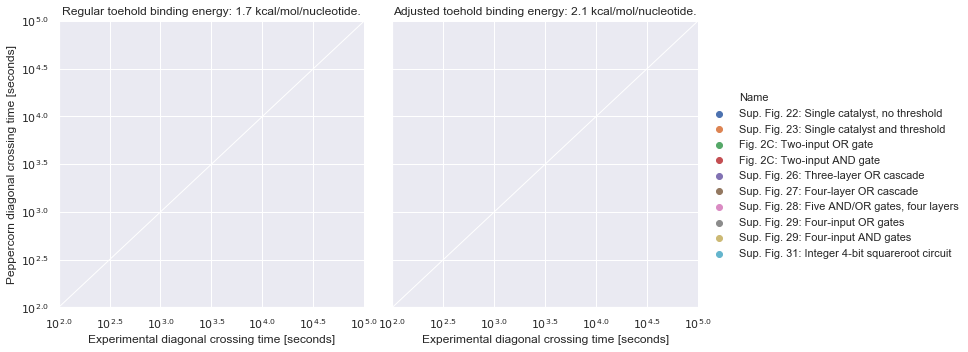

In [7]:
display(Table1)
Table1.to_latex('SeesawData.tex', index=False, float_format='{:.3g}'.format)

tmpfig = Table1.copy()
tmpfig['Time (experiment)'] = log10(tmpfig['Time (experiment)'])
tmpfig['Time (simulation)'] = log10(tmpfig['Time (simulation)'])
#tmpfig = tmpfig.loc[tmpfig['pepperargs'].isin(['seesaw'])]
#tmpfig = tmpfig.loc[tmpfig['name'].isin(['Qian2011-SF22', 'Qian2011-SF23'])]
#tmpfig = tmpfig.loc[tmpfig['name'].isin([fig.name for fig in z11])]
#tmpfig.reset_index(inplace=True, drop=True)
#tmpfig = tmpfig.iloc[0:-1]
#tmpfig = tmpfig.iloc[[4,5,6,7,28,29,30,31], :]
#display(tmpfig)

g = sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', col="Semantics", data=tmpfig, col_order=['default', 'ddG'])
 
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(2, 5)
plt.xlim(mi, ma)
plt.ylim(mi, ma)

for ax in plt.gcf().get_axes():
    #print(ax)
    ax.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: "$10^{{ {:.1f} }}$".format(x)))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: "$10^{{ {:.1f} }}$".format(x)))
    ax.set(xlabel='Experimental diagonal crossing time [seconds]')
    
plt.gcf().get_axes()[0].set(ylabel='Peppercorn diagonal crossing time [seconds]')
#g.set_titles(row_template="{row_name}", col_template="{col_name}")
axes = g.axes.flatten()
axes[0].set_title("Regular toehold binding energy: 1.7 kcal/mol/nucleotide.")
#axes[1].set_title("condensed, $k_{fast} = 1, k_{slow} = 0.01, ddG = 2 kcal/mol$")
axes[1].set_title("Adjusted toehold binding energy: 2.1 kcal/mol/nucleotide.")
#condensed, ddG_bind=0.0, k_fast=1, k_slow=0.01

plt.savefig('seesaw_times_peppercorn.pdf', bbox_inches='tight')
plt.savefig('seesaw_times_peppercorn.svg', bbox_inches='tight')


In [ ]:
tmpfig = Table1.copy()
tmpfig['Time (experiment)'] = log10(tmpfig['Time (experiment)'])
tmpfig['Time (simulation)'] = log10(tmpfig['Time (simulation)'])

g = sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', col="Semantics", data=tmpfig, col_order=['seesaw'])
 
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(2, 5)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)

for ax in plt.gcf().get_axes():
    #print(ax)
    ax.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
    ax.set(xlabel='Experimental diagonal crossing time [seconds]')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: "$10^{{ {:.1f} }}$".format(x)))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: "$10^{{ {:.1f} }}$".format(x)))
    
plt.gcf().get_axes()[0].set(ylabel='Seesaw model diagonal crossing time [seconds]')
g.set_titles(row_template="{row_name}", col_template="{col_name}")
axes = g.axes.flatten()
axes[0].set_title("Seesaw reaction model Qian & Winfree (2011)")
#axes[1].set_title("Toehold binding energy $T = T+2.0$ kcal/mol")
#condensed, ddG_bind=0.0, k_fast=1, k_slow=0.01

plt.savefig('seesaw_times_qian.pdf', bbox_inches='tight')
plt.savefig('seesaw_times_qian.svg', bbox_inches='tight')
